In [206]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy import optimize

In [77]:
def fractional_brown_motion(H,N,T):
    gamma = np.zeros(N)
    for k in range(N):
        gamma[k] = 0.5*((k+1)**(2*H) + np.abs(k-1)**(2*H) - 2*(k)**(2*H))
    Z = np.random.normal(size = N)
    X = np.zeros(N)
    A = np.zeros((N,N))
    A[0,0]=1
    A[1,0]=gamma[1]
    A[1,1]=np.sqrt(1-(gamma[1]**2))
    rang1 = np.arange(2,N)
    for i in rang1:
        A[i,0] = gamma[i]
        rang2 = np.arange(1,i)
        for j in rang2:         
            A[i,j] = (1/A[j,j])*(gamma[i-j] - (A[i,0:j] @ A[j,0:j]))

        A[i,i] = np.sqrt(1 - np.sum((A[i,0:i]**2))) 
    answer = A @ np.transpose(Z) # @ to metoda z np służąca do mnożenia macierzy
    return np.cumsum(answer)*(T/N)**H
    

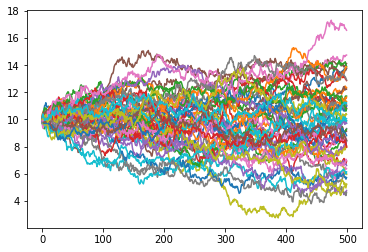

In [104]:
for i in range(50):
    plt.plot(fractional_brown_motion(0.5,500,10)+10)


In [114]:
x = fractional_brown_motion(0.5,500,10)

In [203]:
def check(a,x_starting):
    x = fractional_brown_motion(0.5,100,10) + x_starting
    if any(x<-a):
        return np.where(x<-a)[0][0]
    elif any(x>a):
        return np.where(x>a)[0][0]
        


In [204]:
x = np.arange(-3,3+0.1,0.1)
lista_średnich = []
for i in range(len(x)):

    li = []
    for j in range(1000):
        li.append(check(3,x[i]))
    li_mean = np.mean(list(filter(lambda item: item is not None, li)))
    lista_średnich.append(li_mean)
    # uwaga czas wykonania to kilkanaście minut!!! dla przyspieszenia można zmniejszyć ilość punktów, albo zmniejszyć prób, albo zmniejszyć N podziałów w symulacji ruchu Browna

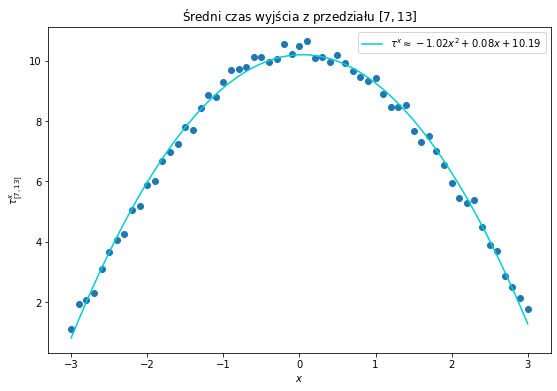

In [211]:

fig, ax = plt.subplots(figsize=(9, 6))


fnct = lambda x, a, b, c: a * x ** 2 + b * x + c
popt, pcov = optimize.curve_fit(fnct, np.arange(-3,3+0.1,0.1), np.array(lista_średnich)/5)
xsp = np.arange(-3, 3+0.01, 0.01)
a,b,c = popt.round(2)
plt.plot(xsp, fnct(xsp, *popt), color="#00CED1", label = f"$\\tau^x\\approx {a}x^2+{b}x+{c}$")
plt.scatter(np.arange(-3,3+0.1,0.1),np.array(lista_średnich)/5)
ax.set_xlabel("$x$")
ax.set_ylabel("$\\tau^x_{[7, 13]}$")
ax.set_title("Średni czas wyjścia z przedziału $[7, 13]$")
ax.legend()